In [1]:
import pandas as pd 
pd.options.mode.chained_assignment = None
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load the data set
spoti = pd.read_csv('G:/ncr_ride_bookings.csv', encoding='ISO-8859-1')

spoti.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [3]:
#Get information about the dataset

pd.set_option('display.float_format', lambda x: '%.2f' % x)
spoti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [4]:
# Check type of data

spoti.info()

# Check for missing values

print(spoti.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

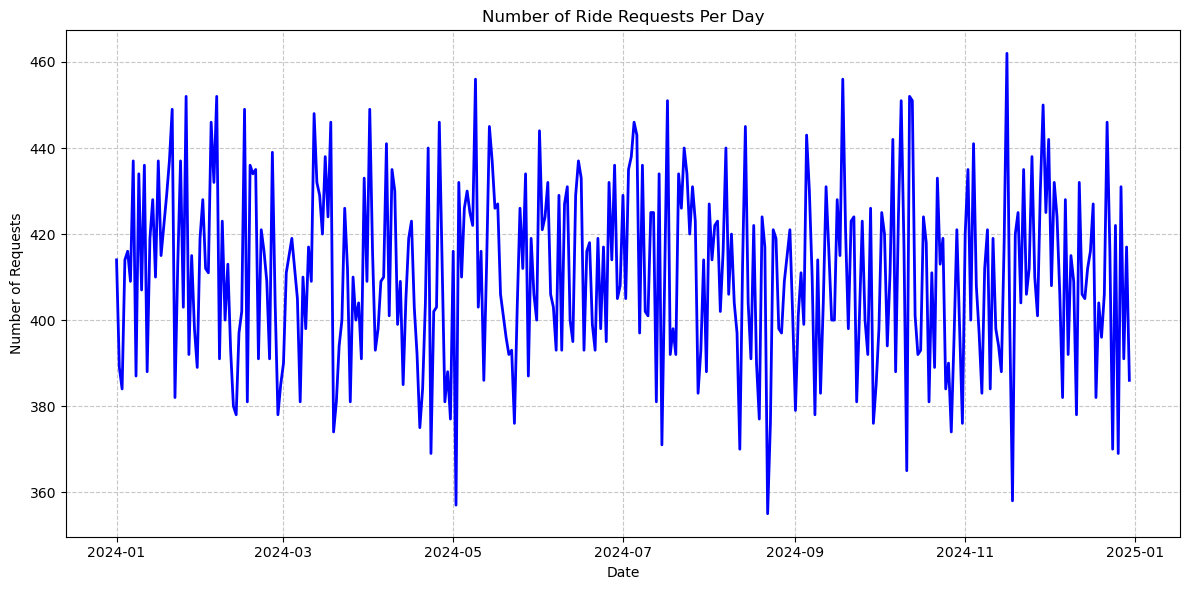

In [5]:
# Distribution by the number of requests per day


# Convert Date column to datetime
spoti['Date'] = pd.to_datetime(spoti['Date'])

# Count requests per day
requests_per_day = spoti.groupby('Date').size().reset_index(name = 'Requests')

# Sort by date just in case
requests_per_day = requests_per_day.sort_values('Date')

# Plotting
plt.figure(figsize = (12, 6))
plt.plot(requests_per_day['Date'], requests_per_day['Requests'], color = 'blue', linewidth = 2)
plt.title('Number of Ride Requests Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Requests')
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.tight_layout()



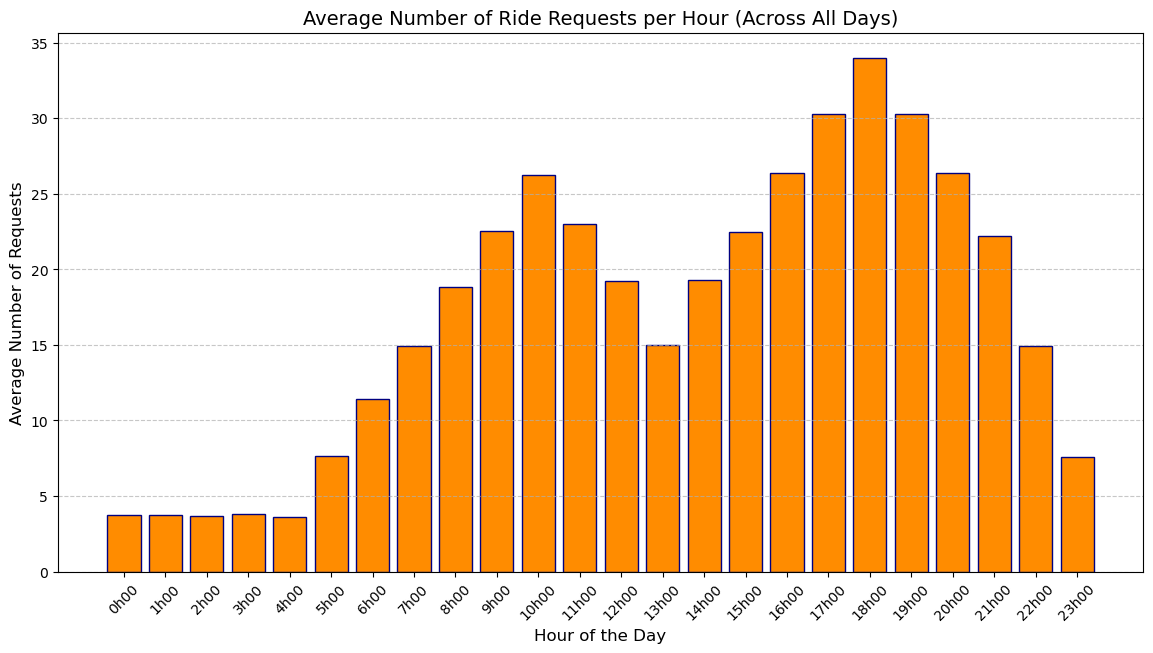

In [6]:
# Distribution by average request per hour

# Extract hour from 'Time' column
# Since Time is a string HH:MM:SS, we can take the first two characters
spoti['Hour'] = spoti['Time'].str.split(':').str[0].astype(int)

# Count unique days
num_days = spoti['Date'].nunique()

# Group by hour to get total requests per hour
hourly_counts = spoti.groupby('Hour').size()

# Calculate average requests per hour
avg_hourly_requests = hourly_counts / num_days

# Prepare labels for X-axis: 0h00, 1h00, ..., 23h00
x_labels = [f"{h}h00" for h in range(24)]
x_ticks = range(24)

# Ensure all hours 0-23 are present in the series
avg_hourly_requests = avg_hourly_requests.reindex(x_ticks, fill_value = 0)

# Plotting
plt.figure(figsize = (14, 7))
plt.bar(x_ticks, avg_hourly_requests.values, color = 'darkorange', edgecolor = 'navy')

plt.title('Average Number of Ride Requests per Hour (Across All Days)', fontsize = 14)
plt.xlabel('Hour of the Day', fontsize = 12)
plt.ylabel('Average Number of Requests', fontsize = 12)
plt.xticks(x_ticks, x_labels, rotation = 45)
plt.grid(axis = 'y', linestyle='--', alpha = 0.7)



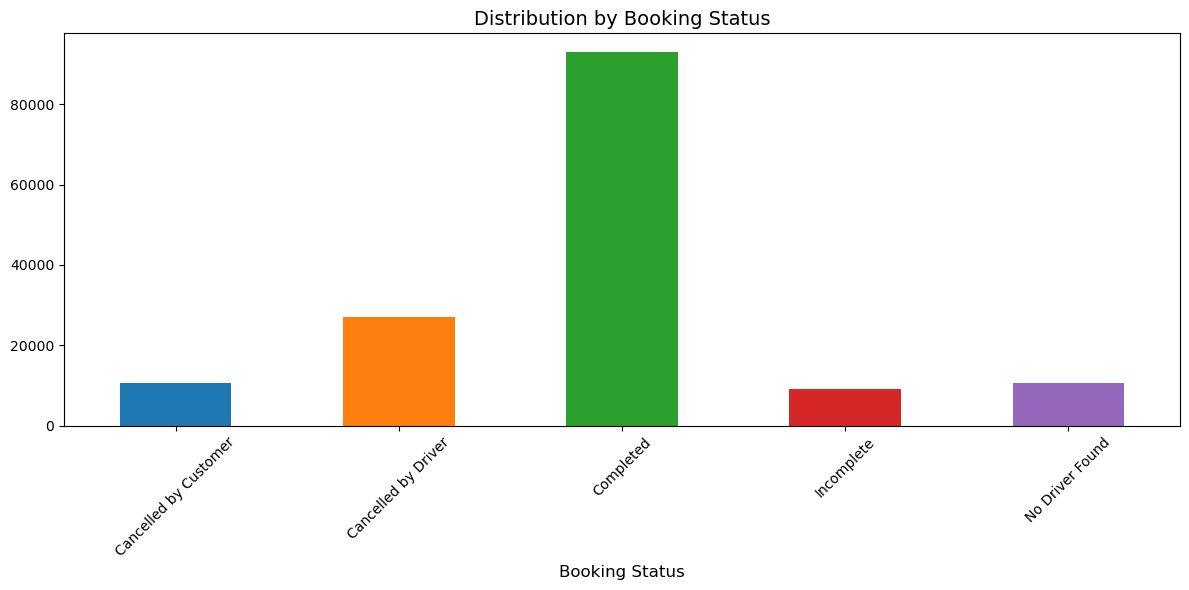

In [7]:
# Distribution by Day of the Week

count = spoti['Booking Status'].value_counts().sort_index()

colors = plt.cm.tab10(range(len(count)))

plt.figure(figsize = (12, 6))  
count.plot(kind = 'bar', color = colors)

plt.xlabel('Booking Status', fontsize = 12)
plt.title('Distribution by Booking Status', fontsize = 14)
plt.xticks(rotation = 45 )  

plt.tight_layout()
plt.show()

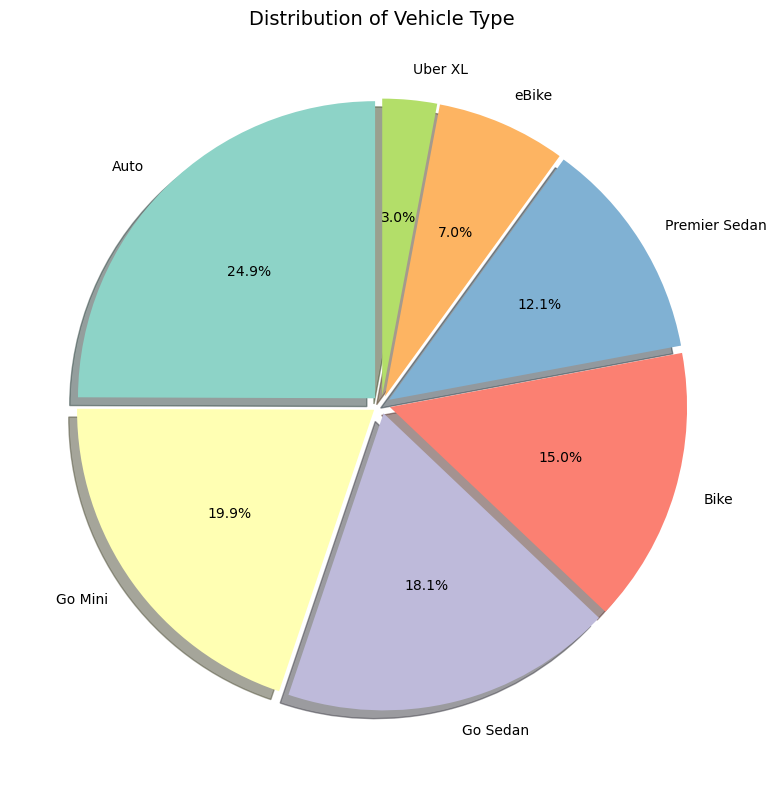

In [8]:
# Distribution by Vehicle Type

sesosa = spoti['Vehicle Type'].value_counts()

colors = plt.cm.Set3(range(len(sesosa)))
explode = [0.03] * len(sesosa)

plt.figure(figsize = (8, 8))

plt.pie( sesosa,
    labels = sesosa.index,
    autopct = '%1.1f%%',
    colors = colors,
    explode = explode,
    shadow = True,
    startangle = 90 )

plt.title('Distribution of Vehicle Type', fontsize = 14)
plt.tight_layout()
plt.show()



Text(0.5, 1.0, 'Correlation between VTAT and CTAT (Sample of 2000)')

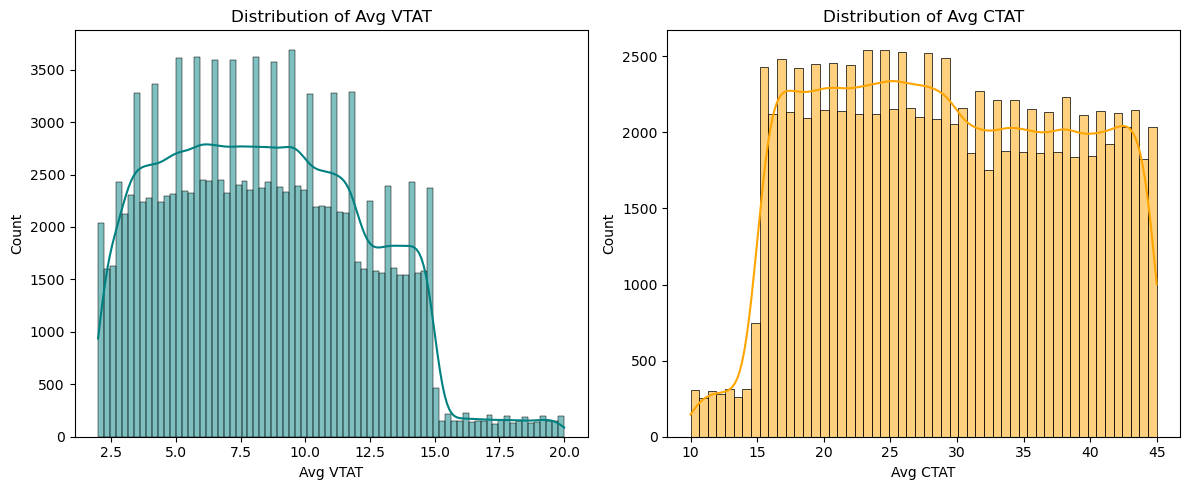

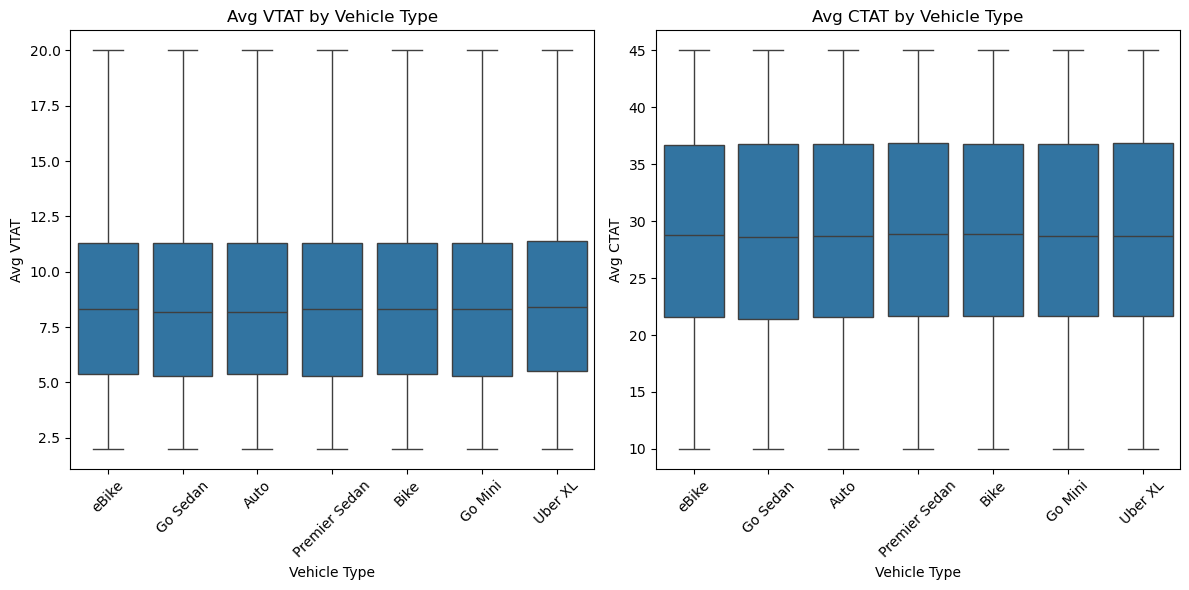

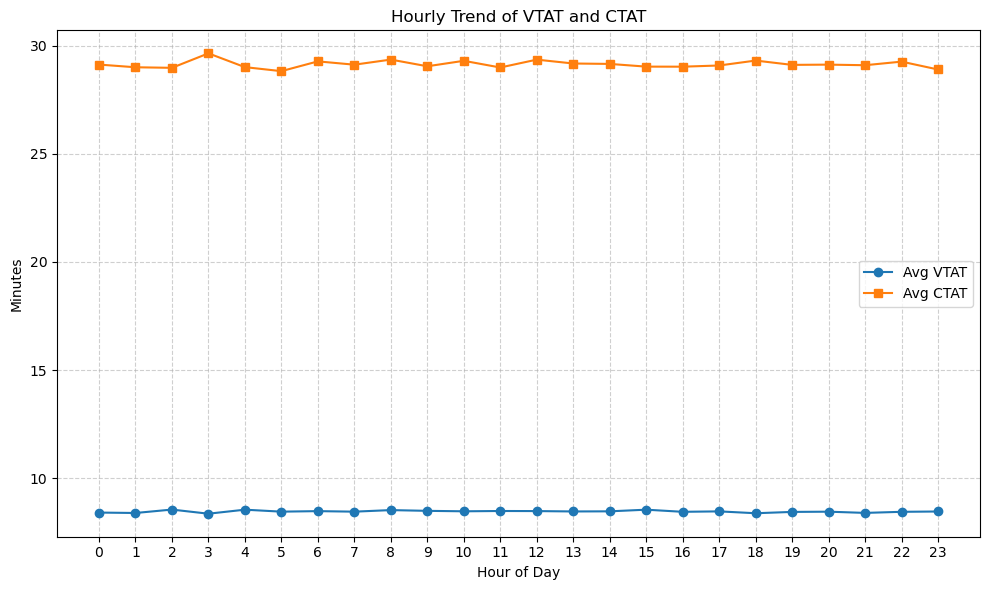

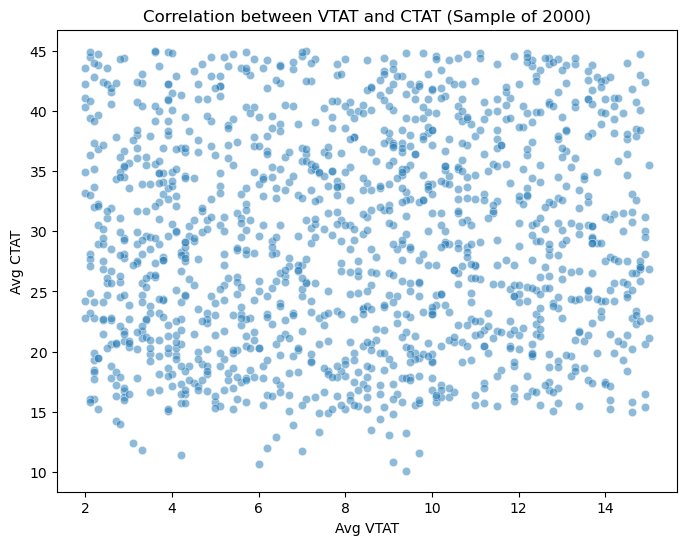

In [9]:
# Distribution by Avg VTAT and Avg VTAT

spoti['Date'] = pd.to_datetime(spoti['Date'])
spoti['Hour'] = spoti['Time'].str.split(':').str[0].astype(int)

# Distribution Plots (Histograms/KDE)
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(spoti['Avg VTAT'].dropna(), kde = True, color = 'teal')
plt.title('Distribution of Avg VTAT')
plt.subplot(1, 2, 2)
sns.histplot(spoti['Avg CTAT'].dropna(), kde = True, color = 'orange')
plt.title('Distribution of Avg CTAT')
plt.tight_layout()


# Box Plots by Vehicle Type
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x = 'Vehicle Type', y = 'Avg VTAT', data = spoti)
plt.xticks(rotation = 45)
plt.title('Avg VTAT by Vehicle Type')
plt.subplot(1, 2, 2)
sns.boxplot(x = 'Vehicle Type', y = 'Avg CTAT', data = spoti)
plt.xticks(rotation = 45)
plt.title('Avg CTAT by Vehicle Type')
plt.tight_layout()


#  Hourly Trends
hourly_vtat_ctat = spoti.groupby('Hour')[['Avg VTAT', 'Avg CTAT']].mean()
plt.figure(figsize = (10, 6))
plt.plot(hourly_vtat_ctat.index, hourly_vtat_ctat['Avg VTAT'], label = 'Avg VTAT', marker = 'o')
plt.plot(hourly_vtat_ctat.index, hourly_vtat_ctat['Avg CTAT'], label = 'Avg CTAT', marker = 's')
plt.title('Hourly Trend of VTAT and CTAT')
plt.xlabel('Hour of Day')
plt.ylabel('Minutes')
plt.xticks(range(24))
plt.legend()
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.tight_layout()


#  Scatter Plot (Correlation)
plt.figure(figsize = (8, 6))
sns.scatterplot(x = 'Avg VTAT', y = 'Avg CTAT', data = spoti.sample(2000), alpha = 0.5)
plt.title('Correlation between VTAT and CTAT (Sample of 2000)')



C:\Users\hocha\AppData\Local\Temp\ipykernel_12652\3633857152.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = failure_counts.values, y = failure_counts.index, ax = axes[0, 0], palette = 'viridis')


Failure Summary: 
Cancelled by Driver     27000.00
Cancelled by Customer   10500.00
Incomplete Rides         9000.00
dtype: float64

Top Customer Cancellation Reason: Wrong Address
Top Driver Cancellation Reason:  Customer related issue
Top Incomplete Ride Reason:  Customer Demand


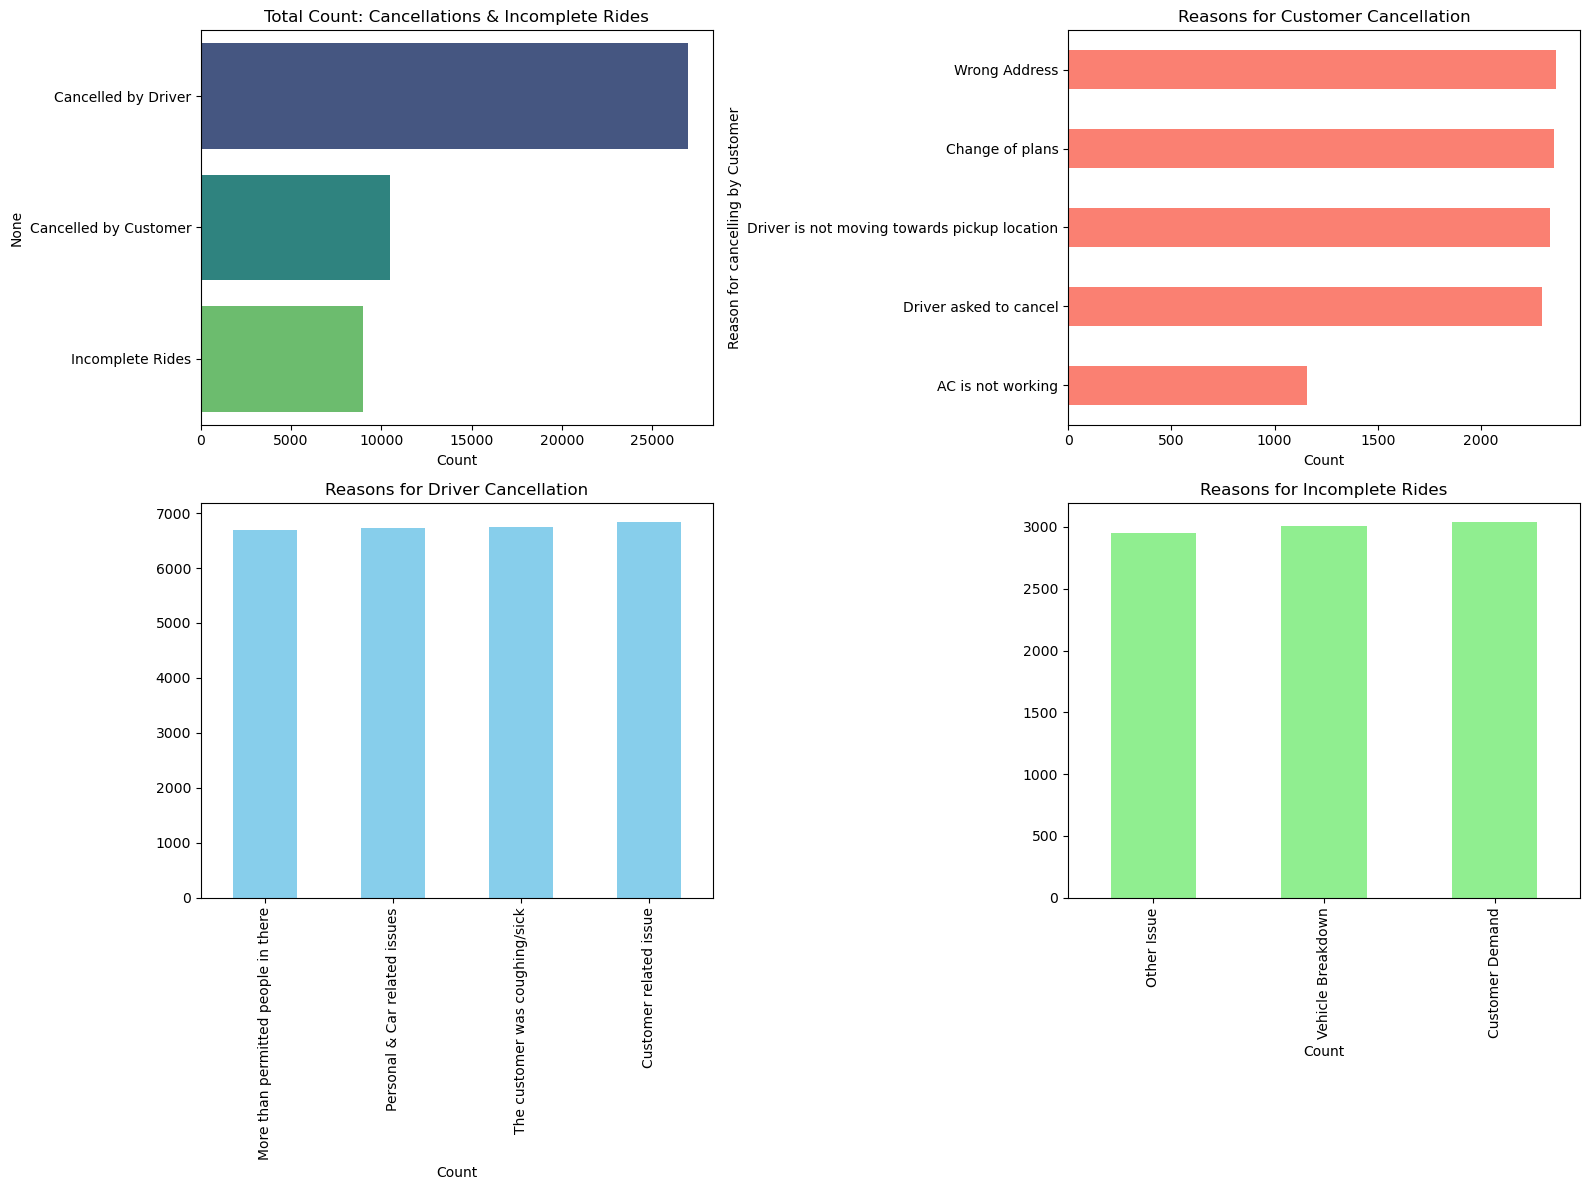

In [10]:
# Distribution by Cancelled Rides by Customer, Cancelled Rides by Driver, Incomplete Rides


# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize = (16, 12))

# Summary Plot: Counts of different failure types
failure_counts = pd.Series({
    'Cancelled by Customer': spoti['Cancelled Rides by Customer'].sum(),
    'Cancelled by Driver': spoti['Cancelled Rides by Driver'].sum(),
    'Incomplete Rides': spoti['Incomplete Rides'].sum()
}).sort_values(ascending = False)

sns.barplot(x = failure_counts.values, y = failure_counts.index, ax = axes[0, 0], palette = 'viridis')
axes[0, 0].set_title('Total Count: Cancellations & Incomplete Rides')
axes[0, 0].set_xlabel('Count')

# Reason for cancelling by Customer
cust_cancel_reasons = spoti['Reason for cancelling by Customer'].value_counts().sort_values(ascending = True)
cust_cancel_reasons.plot(kind = 'barh', ax = axes[0, 1], color = 'salmon')
axes[0, 1].set_title('Reasons for Customer Cancellation')
axes[0, 1].set_xlabel('Count')

# Driver Cancellation Reason
driver_cancel_reasons = spoti['Driver Cancellation Reason'].value_counts().sort_values(ascending = True)
driver_cancel_reasons.plot(kind = 'bar', ax = axes[1, 0], color = 'skyblue')
axes[1, 0].set_title('Reasons for Driver Cancellation')
axes[1, 0].set_xlabel('Count')

# Incomplete Rides Reason
incomplete_reasons = spoti['Incomplete Rides Reason'].value_counts().sort_values(ascending = True)
incomplete_reasons.plot(kind = 'bar', ax = axes[1, 1], color = 'lightgreen')
axes[1, 1].set_title('Reasons for Incomplete Rides')
axes[1, 1].set_xlabel('Count')
plt.tight_layout()


# Print counts for the response
print('Failure Summary: ')
print(failure_counts)
print('\nTop Customer Cancellation Reason:', cust_cancel_reasons.index[-1])
print('Top Driver Cancellation Reason: ', driver_cancel_reasons.index[-1])
print('Top Incomplete Ride Reason: ', incomplete_reasons.index[-1])


count   102000.00
mean       508.30
std        395.81
min         50.00
25%        234.00
50%        414.00
75%        689.00
max       4277.00
Name: Booking Value, dtype: float64


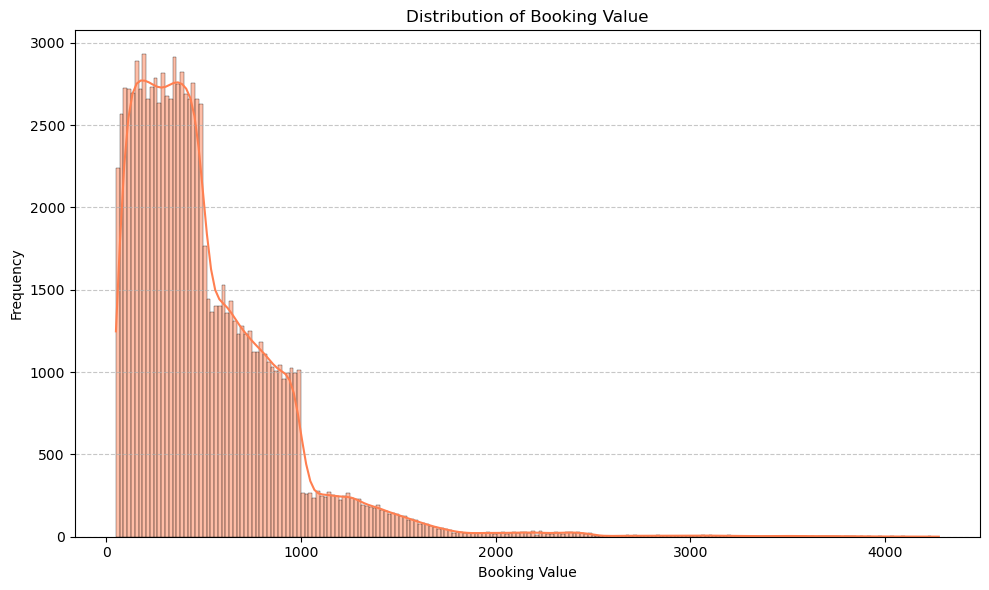

In [11]:
# Distribution of Booking Value

plt.figure(figsize = (10, 6))
sns.histplot(spoti['Booking Value'].dropna(), kde = True, color = 'coral')
plt.title('Distribution of Booking Value')
plt.xlabel('Booking Value')
plt.ylabel('Frequency')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()

# Print summary stats
print(spoti['Booking Value'].describe())


Total distance covered in the dataset: 2512975.19 km
Average daily total distance: 6884.86 km


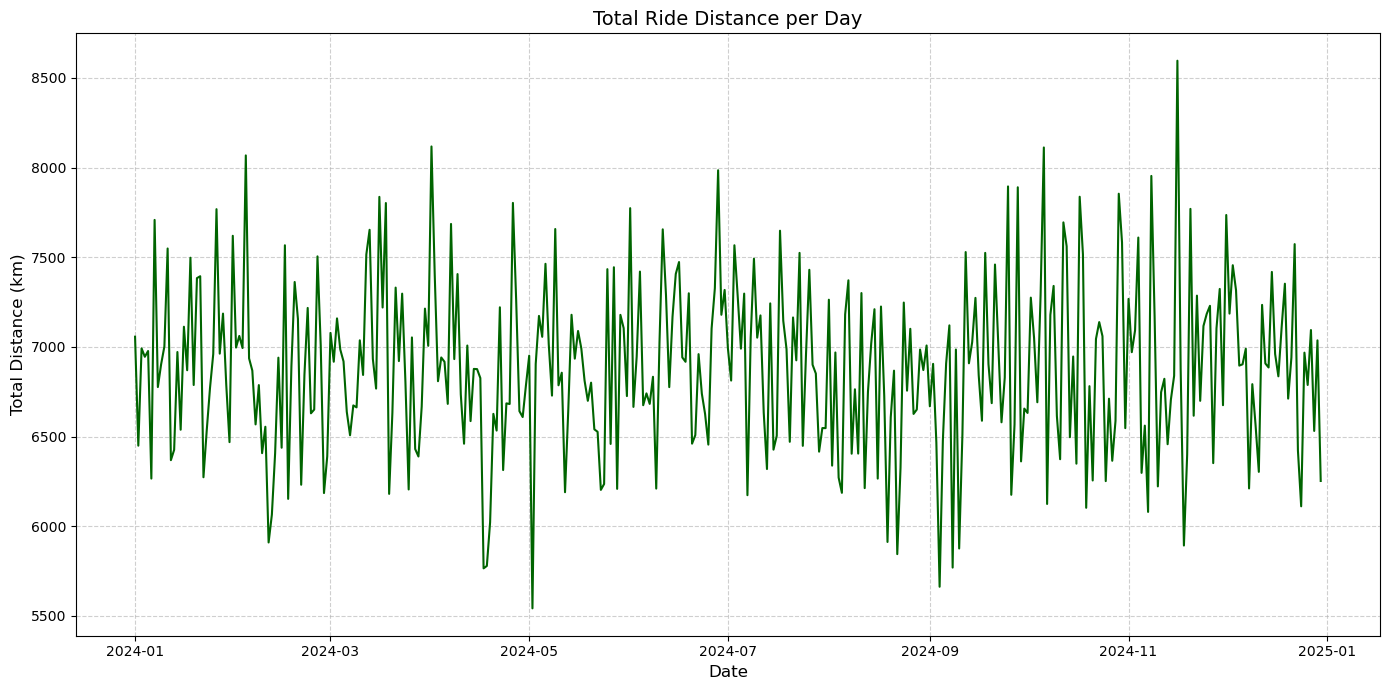

In [12]:
# Checking Date vs Ride Distance

spoti['Date'] = pd.to_datetime(spoti['Date'])

# Sum Ride Distance per day
distance_per_day = spoti.groupby('Date')['Ride Distance'].sum().reset_index()

# Sort by date
distance_per_day = distance_per_day.sort_values('Date')

# Plotting
plt.figure(figsize = (14, 7))
plt.plot(distance_per_day['Date'], distance_per_day['Ride Distance'], color = 'darkgreen', linewidth = 1.5)

plt.title('Total Ride Distance per Day', fontsize = 14)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Total Distance (km)', fontsize = 12)
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.tight_layout()


# Print summary stats for context
print(f'Total distance covered in the dataset: {distance_per_day['Ride Distance'].sum():.2f} km')
print(f'Average daily total distance: {distance_per_day['Ride Distance'].mean():.2f} km')

Average Driver Rating: 4.23
Average Customer Rating: 4.40


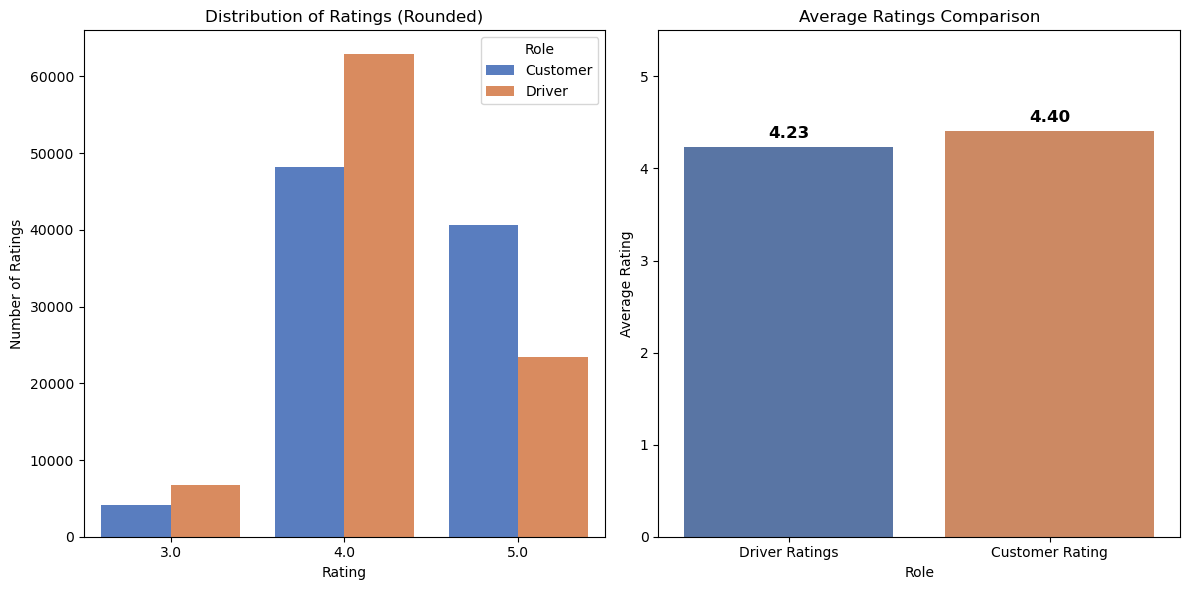

In [13]:
# Checking Production Outliers

# Drop NaNs for ratings
ratings_spoti = spoti[['Driver Ratings', 'Customer Rating']].dropna()

# Comparison of Averages
avg_driver = ratings_spoti['Driver Ratings'].mean()
avg_customer = ratings_spoti['Customer Rating'].mean()

#  Comparison of Distribution (counts of rounded ratings)
ratings_spoti['Driver'] = ratings_spoti['Driver Ratings'].round()
ratings_spoti['Customer'] = ratings_spoti['Customer Rating'].round()

# Melt the dataframe for a grouped bar chart
melted = ratings_spoti[['Driver', 'Customer']].melt(var_name = 'Role', value_name = 'Rating')

# Group by Role and Rating to get counts
counts = melted.groupby(['Role', 'Rating']).size().reset_index(name = 'Count')

# Create plot
plt.figure(figsize = (12, 6))

# Subplot 1: Distribution of Ratings
plt.subplot(1, 2, 1)
sns.barplot(data = counts, x = 'Rating', y = 'Count', hue = 'Role', palette = 'muted')
plt.title('Distribution of Ratings (Rounded)')
plt.ylabel('Number of Ratings')

# Subplot 2: Average Ratings
plt.subplot(1, 2, 2)
avg_data = pd.DataFrame({
    'Role': ['Driver Ratings', 'Customer Rating'],
    'Average': [avg_driver, avg_customer]
})
sns.barplot(data = avg_data, x = 'Role', y = 'Average', hue = 'Role', palette = 'deep')
plt.ylim(0, 5.5) # Ratings are on a 1-5 scale
plt.title('Average Ratings Comparison')
plt.ylabel('Average Rating')

# Add labels on top of bars for averages
for i, v in enumerate([avg_driver, avg_customer]):
    plt.text(i, v + 0.1, f'{v:.2f}', ha = 'center', fontsize = 12, fontweight = 'bold')

# Remove legend from subplot 2 if it exists
if plt.gca().get_legend():
    plt.gca().get_legend().remove()
plt.tight_layout()

print(f'Average Driver Rating: {avg_driver:.2f}')
print(f'Average Customer Rating: {avg_customer:.2f}')


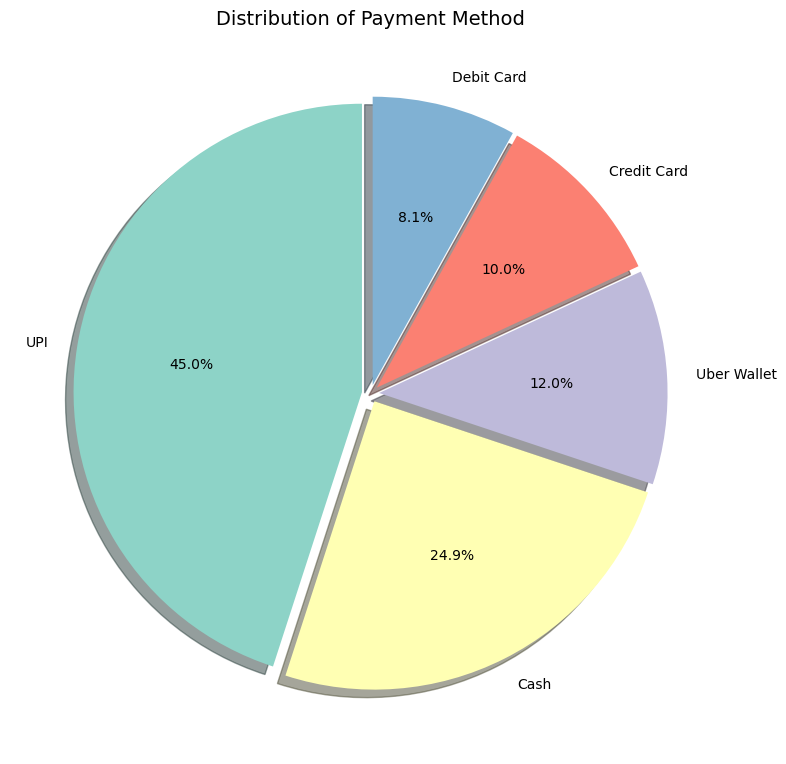

In [14]:
# Distribution by Payment Method

patala = spoti['Payment Method'].value_counts()

colors = plt.cm.Set3(range(len(patala)))
explode = [0.03] * len(patala)

plt.figure(figsize = (8, 8))

plt.pie( patala,
    labels = patala.index,
    autopct = '%1.1f%%',
    colors = colors,
    explode = explode,
    shadow = True,
    startangle = 90 )

plt.title('Distribution of Payment Method', fontsize = 14)
plt.tight_layout()
plt.show()